# Cristian Alejandro Pulido
## cpulido@unal.edu.co
### assigment 2

## Data set

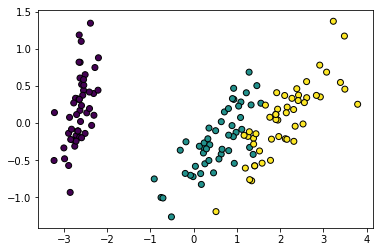

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from IPython.display import display, Math, Latex
iris = datasets.load_iris()
Xorig = iris.data
y = iris.target
pca = PCA(n_components=2)
X = pca.fit(Xorig).transform(Xorig)
%matplotlib inline
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, edgecolor='k')

In [18]:
#parte de los datos que pertenecen a la clase 0
clase0=np.argwhere(y==0)
clase0=clase0[:,0]
#parte de los datos que pertenecen a la clase 1
clase1=np.argwhere(y==1)
clase1=clase1[:,0]
#parte de los datos que pertenecen a la clase 2
clase2=np.argwhere(y==2)
clase2=clase2[:,0]
#probabilidad de la clase 1 P(C1)
P1=1.0*len(y[clase1])/(len(y[clase1])+len(y[clase2]))
#probabilidad de la clase 2 P(C2)
P2=1.0*len(y[clase2])/(len(y[clase1])+len(y[clase2]))

# Estimaciones probabilidad clases 1 y 2 
$$P(C_i)=\frac{1}{n}\sum_{x \in X}{I_i(x)}$$
$$X: \mbox{Conjunto de datos} $$
$$x: \mbox{Dato particular} $$
$I(x):$ Funcion indicador, vale 1 cuando $x\in C_i$ de lo contrario es cero
P1

In [19]:
print("P(C1)="+str(P1))
print("P(C2)="+str(P2))

P(C1)=0.5
P(C2)=0.5


In [20]:
#distribucion bivariada normal clase 1
#estimacion parametros:
mu1=sum(X[clase1])/len(X[clase1])
Sigma1=1.0/(len(X[clase1]))*np.dot((X[clase1]-mu1).T,(X[clase1]-mu1))
print("Parametros de la distribucion de probabilidad para la clase 1")
print("mu=",mu1)
print("Sigma=", Sigma1)
#distribucion bivariada normal clase 2
#estimacion parametros:
mu2=sum(X[clase2])/len(X[clase2])
Sigma2=1.0/(len(X[clase2]))*np.dot((X[clase2]-mu2).T,(X[clase2]-mu2))
print("Parametros de la distribucion de probabilidad para la clase 2")
print("mu=",mu2)
print("Sigma=", Sigma2)
#suponiendo las matrices de covarianza iguales tenemos que
S=P1*Sigma1+P2*Sigma2
print("Suponiendo matrices de covarianza iguales:")
print("S=Sigma1*P(C1)+Sigma2*P(C2)")
print(S)

Parametros de la distribucion de probabilidad para la clase 1
('mu=', array([ 0.53199262, -0.24402963]))
('Sigma=', array([[0.34899363, 0.19443157],
       [0.19443157, 0.18078976]]))
Parametros de la distribucion de probabilidad para la clase 2
('mu=', array([2.10884814, 0.05350968]))
('Sigma=', array([[0.48896484, 0.26977165],
       [0.26977165, 0.22766092]]))
Suponiendo matrices de covarianza iguales:
S=Sigma1*P(C1)+Sigma2*P(C2)
[[0.41897924 0.23210161]
 [0.23210161 0.20422534]]


## Estimacion parametros de una distribucion normal para los datos de las clases

### Media para la clase $C_i$:
$$\mu_i=\frac{\sum_{x \in X}{xI_i(x)}}{\sum_{x \in X}{I_i(x)}}$$
### Sigma para la clase $C_i$:
$$\Sigma_i=\frac{\sum_{x \in X}{I_i(x)(x-\mu_i)^T(x-\mu_i)}}{\sum_{x \in X}{xI_i(x)}}$$
### Suponiendo las matrices de covarianza iguales, hacemos:
$$\Sigma=\sum_{i=1}^{\mbox{# clases}}{P(C_i)\Sigma_i}$$

In [21]:
print("mu1="+str(mu1))
print("mu2="+str(mu2))
print("Sigma="+str(S))

mu1=[ 0.53199262 -0.24402963]
mu2=[2.10884814 0.05350968]
Sigma=[[0.41897924 0.23210161]
 [0.23210161 0.20422534]]


## Probabilidad condicional de x dada una clase:
$$p(x|C_i)=\frac{1}{(2\pi|\Sigma|)^{1/2}}exp (-\frac{1}{2}(x-\mu_i)\Sigma^{-1}(x-\mu_i)^T)$$
*En nuestro caso como x es vector fila cambian las posiciones de la matriz transpuesta y la original.

Luego definimos la funcion discriminante de cada clase como:

$$g_i(x)=log p(x|C_i)+log P(C_i)$$

Graficando las regiones que determinan las funciones discriminate para las clases 1 y 2 donde cada una de ellas es maxima obtenemos el siguiente dibujo.



Grafica de regiones de clases 1 y 2 


Clase 1: circulos rojos
Clase 2: exis azules


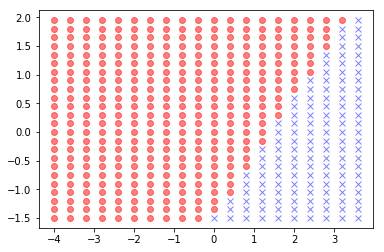

In [22]:
#funcion Discriminate
def g(x,mu,sigma,Pclase):
    #probabilidad de x dado la clase P(x |c_i)
    p=1.0/((2*np.pi)*(np.linalg.det(sigma))**(0.5))*np.exp(-0.5*np.dot(np.dot((x-mu),np.linalg.inv(sigma)),(x-mu).T))
    #probabilidad clase c_i
    P=Pclase
    #funcion discriminante de la clase i
    return np.log(p)+np.log(P)
#Funcion clasificador que escoge el valor maximo segun el discriminante
def clasificador(x):
    c1=g(x,mu1,S,P1)
    c2=g(x,mu2,S,P2)
    if c1>c2:
        return 1
    elif c2>c1:
        return 2
#Grafica regiones evaluando una malla de puntos en la funcion clasificador
a=[]
for i in np.arange(-4,4,0.4):
    for j in np.arange(-1.5,2,0.15):
        a.append([i,j])
for i in a:
    if clasificador(i)==1:
        plt.plot(i[0],i[1],'o',color='r',alpha=0.5,label="Clase 1")        
    elif clasificador(i)==2:
        plt.plot(i[0],i[1],'x',color='b',alpha=0.5,label="Clase 2")       
print("\n")
print("Grafica de regiones de clases 1 y 2 ")
print("\n")
print("Clase 1: circulos rojos")
print("Clase 2: exis azules")
plt.show()  

## Cota de decision
La cota de decision es el lugar geometrico que divide las dos regiones, para esto decimos que $x \in C_1$ si $g_1(x)-g_2(x)>0$, de otro modo $x \in C_2$. De modo que remplazando $g_1(x)-g_2(x)$ obtenemos.

$$g_1(x)-g_2(x)=log p(x|C_1)+log P(C_i)-log p(x|C_2)-log P(C_2)$$

Ya que sabemos $p(x|c_i)$ en forma explicita, reemplzando y bajo las propiedades de log, lo anterior es equivalente a 

$$-\frac{1}{2}log(2\pi)-\frac{1}{2}log(|\Sigma|)-\frac{1}{2}(x-\mu_1)\Sigma^{-1}(x-\mu_1)^T+log P(C_1)+\frac{1}{2}log(2\pi)+\frac{1}{2}log(|\Sigma|)+\frac{1}{2}(x-\mu_2)\Sigma^{-1}(x-\mu_2)^T-log P(C_2)$$

Operando y aplicando las propiedades de la Transposicion de matrices y distribucion de la multiplicacion.

$$\frac{1}{2}[x\Sigma^{-1}x^T-x\Sigma^{-1}\mu_2^T-\mu_2\Sigma^{-1}x^T+\mu_2\Sigma^{-1}\mu_2^T-(x\Sigma^{-1}x^T-x\Sigma^{-1}\mu_1^T-\mu_1\Sigma^{-1}x^T+\mu_1\Sigma^{-1}\mu_1^T)]+log P(C_1)+log P(C_2)$$

Note que, como $x\Sigma^{-1}\mu_2^T$ es un numero real, es igual a su transpuesta y asi

$$x\Sigma^{-1}\mu_2^T=(x\Sigma^{-1}\mu_2^T)^T=\mu_2\Sigma^{-1}x^T$$

Aplicando esto ultimo a lo hallado anteriormente

$$x(\Sigma^{-1}\mu_1^T-\Sigma^{-1}\mu_2^T)+1/2[\mu_2\Sigma^{-1}\mu_2^T-\mu_1\Sigma^{-1}\mu_1^T]+log P(C_1)+log P(C_2)$$

De este modo:

$$g_1(x)-g_2(x)=xW_1+W_2$$

con

$$W_1=\Sigma^{-1}\mu_1^T-\Sigma^{-1}\mu_2^T$$

y

$$W_2=1/2[\mu_2\Sigma^{-1}\mu_2^T-\mu_1\Sigma^{-1}\mu_1^T]+log P(C_1)+log P(C_2)$$


Note que $W_1$ es un vector de tamaño (2x1) y $W_2$ es un real, igualando $g_1(x)-g_2(x)$ a cero encontramos la recta que divide las dos regiones. Para hallar la ecuacion de la recta de la forma $y=mx+b$, reemplazamos $x=[x,y]$ y asi:

$$[x,y]W_1+W_2=0$$

$$xW_1[0]+yW_1[1]+W_2=0$$

$$y=-\frac{xW_1[0]+W_2}{W_1[1]}$$


Pendiente:1.0482604880047888
Punto de corte:-1.297334240569889


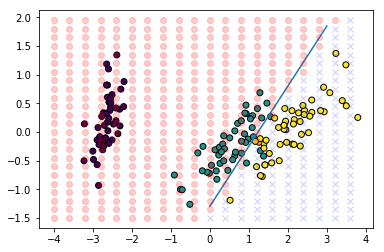

In [23]:
W1=np.dot(np.linalg.inv(S),mu1.T-mu2.T)
W2=0.5*(np.dot(np.dot(mu2,np.linalg.inv(S)),mu2.T)-np.dot(np.dot(mu1,np.linalg.inv(S)),mu1.T))+np.log(P1)+np.log(P2)
ejex=np.arange(0,4)
ejey=-(ejex*(W1[0])+W2)/W1[1]
print("Pendiente:"+str(-W1[0]/W1[1]))
print("Punto de corte:"+str(-W2/W1[1]))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, edgecolor='k')
plt.plot(ejex,ejey)
a=[]
for i in np.arange(-4,4,0.4):
    for j in np.arange(-1.5,2,0.15):
        a.append([i,j])
for i in a:
    if clasificador(i)==1:
        plt.plot(i[0],i[1],'o',color='r',alpha=0.2)
    elif clasificador(i)==2:
        plt.plot(i[0],i[1],'x',color='b',alpha=0.2)
plt.show()

Si cambiamos las probabilidades a priori de las clases $C_1$ y $C_2$, ya que solo $W_2$ depende de estas se puede decir que cambiara el punto de corte con el eje y.

Ademas, ya que en la forma original $P(C_1)=P(C_2)$ la probabilidad que se vea aumentada conlleva a que su region respectiva se haga un poco mas grande y viceversa.

P(C1)=0.00245179552188
P(C2)=0.997548204478
Pendiente:1.0482604880047888
Punto de corte:-0.6896304433202057


Grafica de regiones de clases 1 y 2 


Clase 1: circulos rojos
Clase 2: exis azules


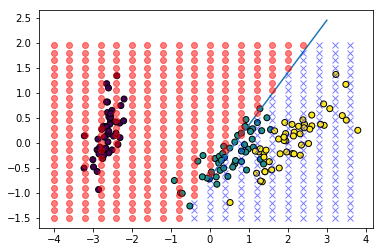

In [24]:
P1=np.random.rand()
P2=1-P1

print("P(C1)="+str(P1))
print("P(C2)="+str(P2))

W1=np.dot(np.linalg.inv(S),mu1.T-mu2.T)
W2=0.5*(np.dot(np.dot(mu2,np.linalg.inv(S)),mu2.T)-np.dot(np.dot(mu1,np.linalg.inv(S)),mu1.T))+np.log(P1)+np.log(P2)
ejex=np.arange(0,4)
ejey=-(ejex*(W1[0])+W2)/W1[1]
print("Pendiente:"+str(-W1[0]/W1[1]))
print("Punto de corte:"+str(-W2/W1[1]))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, edgecolor='k')
plt.plot(ejex,ejey)
a=[]
for i in np.arange(-4,4,0.4):
    for j in np.arange(-1.5,2,0.15):
        a.append([i,j])
for i in a:
    if clasificador(i)==1:
        plt.plot(i[0],i[1],'o',color='r',alpha=0.5,label="Clase 1")        
    elif clasificador(i)==2:
        plt.plot(i[0],i[1],'x',color='b',alpha=0.5,label="Clase 2")       
print("\n")
print("Grafica de regiones de clases 1 y 2 ")
print("\n")
print("Clase 1: circulos rojos")
print("Clase 2: exis azules")
plt.show()    

## 2 Punto
## a) Usando las tres clases (Con matriz de covarianza unica) obtenemos

P(C0)=0.333333333333
P(C1)=0.333333333333
P(C2)=0.333333333333
Parametros de la distribucion de probabilidad para la clase 0
mu=[-2.64084076  0.19051995]
Parametros de la distribucion de probabilidad para la clase 1
mu=[ 0.53199262 -0.24402963]
Parametros de la distribucion de probabilidad para la clase 2
mu=[2.10884814 0.05350968]
Suponiendo matrices de covarianza iguales:
S=Sigma0*P(C0)+Sigma1*P(C1)+Sigma2*P(C2)
[[0.29524298 0.17337034]
 [0.17337034 0.20772475]]


Grafica de regiones de clases 0, 1 y 2 


Clase 0: cuadrados verdes
Clase 1: circulos rojos
Clase 2: exis azules


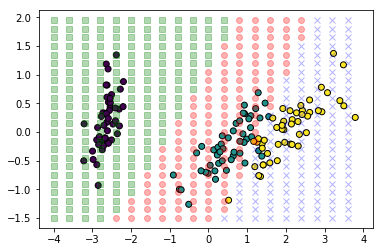

Considerando matrices de covarianza distintas


Grafica de regiones de clases 0, 1 y 2 


Clase 0: cuadrados verdes
Clase 1: circulos rojos
Clase 2: exis azules


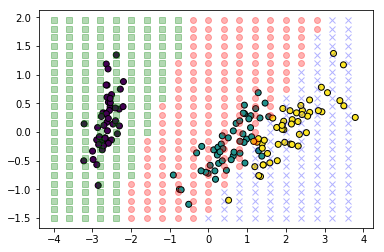

In [25]:
### 2 punto
#a) usando las tres clases, con matrices de covarianza iguales

#probabilidad de la clase 1 P(C1)
P0=1.0*len(y[clase0])/(len(y[clase0])+len(y[clase1])+len(y[clase2]))
print("P(C0)="+str(P0))
#probabilidad de la clase 2 P(C2)
P1=1.0*len(y[clase1])/(len(y[clase0])+len(y[clase1])+len(y[clase2]))
print("P(C1)="+str(P1))
#probabilidad de la clase 2 P(C2)
P2=1.0*len(y[clase2])/(len(y[clase0])+len(y[clase1])+len(y[clase2]))
print("P(C2)="+str(P2))
#distribucion bivariada normal clase 0
#estimacion parametros:
mu0=sum(X[clase0])/len(X[clase0])
Sigma0=1.0/(len(X[clase0]))*np.dot((X[clase0]-mu0).T,(X[clase0]-mu0))
print("Parametros de la distribucion de probabilidad para la clase 0")
print("mu="+str(mu0))
#print("Sigma="+str(Sigma0))
#distribucion bivariada normal clase 1
#estimacion parametros:
mu1=sum(X[clase1])/len(X[clase1])
Sigma1=1.0/(len(X[clase1]))*np.dot((X[clase1]-mu1).T,(X[clase1]-mu1))
print("Parametros de la distribucion de probabilidad para la clase 1")
print("mu="+str(mu1))
#print("Sigma="+str(Sigma1))
#distribucion bivariada normal clase 2
#estimacion parametros:
mu2=sum(X[clase2])/len(X[clase2])
Sigma2=1.0/(len(X[clase2]))*np.dot((X[clase2]-mu2).T,(X[clase2]-mu2))
print("Parametros de la distribucion de probabilidad para la clase 2")
print("mu="+str(mu2))
#print("Sigma="+str(Sigma2))
#suponiendo las matrices de covarianza iguales tenemos que
S=P0*Sigma0+P1*Sigma1+P2*Sigma2
print("Suponiendo matrices de covarianza iguales:")
print("S=Sigma0*P(C0)+Sigma1*P(C1)+Sigma2*P(C2)")
print(S)

#funcion Discriminate
def g(x,mu,sigma,Pclase):
    #probabilidad de x dado la clase P(x |c_i)
    p=1.0/((2*np.pi)*(np.linalg.det(sigma))**(0.5))*np.exp(-0.5*np.dot(np.dot((x-mu),np.linalg.inv(sigma)),(x-mu).T))
    #probabilidad clase c_i
    P=Pclase
    #funcion discriminante de la clase i
    return np.log(p)+np.log(P)
#Funcion clasificador que escoge el valor maximo segun el discriminante
def clasificador(x):
    c0=g(x,mu0,S,P0)
    c1=g(x,mu1,S,P1)
    c2=g(x,mu2,S,P2)
    if c0>c1 and c0>c2:
        return 0
    elif c1>c0 and c1>c2:
        return 1
    elif c2>c0 and c2>c1:
        return 2
#Grafica regiones evaluando una malla de puntos en la funcion clasificador
a=[]
for i in np.arange(-4,4,0.4):
    for j in np.arange(-1.5,2,0.15):
        a.append([i,j])
for i in a:
    if clasificador(i)==0:
        plt.plot(i[0],i[1],'s',color='g',alpha=0.3,label="Clase 0") 
    elif clasificador(i)==1:
        plt.plot(i[0],i[1],'o',color='r',alpha=0.3,label="Clase 1")        
    elif clasificador(i)==2:
        plt.plot(i[0],i[1],'x',color='b',alpha=0.3,label="Clase 2")  
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, edgecolor='k')
print("\n")
print("Grafica de regiones de clases 0, 1 y 2 ")
print("\n")
print("Clase 0: cuadrados verdes")
print("Clase 1: circulos rojos")
print("Clase 2: exis azules")
plt.show()    

print("Considerando matrices de covarianza distintas")

#b) usando las tres clases, con matrices de covarianza distintas

#Funcion clasificador que escoge el valor maximo segun el discriminante
def clasificador(x):
    c0=g(x,mu0,Sigma0,P0)
    c1=g(x,mu1,Sigma1,P1)
    c2=g(x,mu2,Sigma2,P2)
    if c0>c1 and c0>c2:
        return 0
    elif c1>c0 and c1>c2:
        return 1
    elif c2>c0 and c2>c1:
        return 2
#Grafica regiones evaluando una malla de puntos en la funcion clasificador
a=[]
for i in np.arange(-4,4,0.4):
    for j in np.arange(-1.5,2,0.15):
        a.append([i,j])
for i in a:
    if clasificador(i)==0:
        plt.plot(i[0],i[1],'s',color='g',alpha=0.3,label="Clase 0") 
    elif clasificador(i)==1:
        plt.plot(i[0],i[1],'o',color='r',alpha=0.3,label="Clase 1")        
    elif clasificador(i)==2:
        plt.plot(i[0],i[1],'x',color='b',alpha=0.3,label="Clase 2")  
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, edgecolor='k')
print("\n")
print("Grafica de regiones de clases 0, 1 y 2 ")
print("\n")
print("Clase 0: cuadrados verdes")
print("Clase 1: circulos rojos")
print("Clase 2: exis azules")
plt.show()    

## 3 PUNTO

Parametros de la distribucion de probabilidad para la clase 0
('mu=', array([-2.63667216,  0.22837741]))
('Sigma=', array([[0.04717454, 0.05182922],
       [0.05182922, 0.21125022]]))
Parametros de la distribucion de probabilidad para la clase 1
('mu=', array([ 0.61579271, -0.20004814]))
('Sigma=', array([[0.32926788, 0.19109369],
       [0.19109369, 0.19298978]]))
Parametros de la distribucion de probabilidad para la clase 2
('mu=', array([2.15709612, 0.05887868]))
('Sigma=', array([[0.56115373, 0.31136064],
       [0.31136064, 0.26031239]]))
lambda=0.99


Grafica de regiones de clases 0, 1 y 2 


Clase 0: cuadrados verdes
Clase 1: circulos rojos
Clase 2: exis azules
Region de rechazo: pentagonos negros


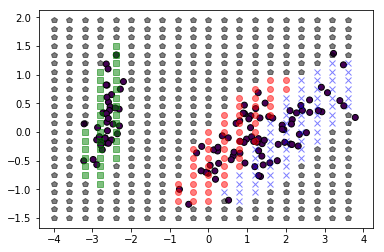

In [66]:
## 3 punto 
## tomamos 80% de los datos para el entrenamiento
C0_train=X[clase0][0:int(len(X[clase0])*0.8)]
C0_test=X[clase0][-int(len(X[clase0])*0.2):]
y0_train=y[clase0][0:int(len(y[clase0])*0.8)]
y0_test=y[clase0][-int(len(y[clase0])*0.2):]
C1_train=X[clase1][0:int(len(X[clase1])*0.8)]
C1_test=X[clase1][-int(len(X[clase1])*0.2):]
y1_train=y[clase1][0:int(len(y[clase1])*0.8)]
y1_test=y[clase1][-int(len(y[clase1])*0.2):]
C2_train=X[clase2][0:int(len(X[clase2])*0.8)]
C2_test=X[clase2][-int(len(X[clase2])*0.2):]
y2_train=y[clase2][0:int(len(y[clase2])*0.8)]
y2_test=y[clase2][-int(len(y[clase2])*0.2):]

#probabilidad de la clase 1 P(C1)
P0=1.0*len(y0_train)/(len(y0_train)+len(y1_train)+len(y2_train))
#probabilidad de la clase 2 P(C2)
P1=1.0*len(y1_train)/(len(y0_train)+len(y1_train)+len(y2_train))
#probabilidad de la clase 2 P(C2)
P2=1.0*len(y2_train)/(len(y0_train)+len(y1_train)+len(y2_train))
#distribucion bivariada normal clase 0
#estimacion parametros:
mu0=sum(C0_train)/len(C0_train)
Sigma0=1.0/(len(C0_train))*np.dot((C0_train-mu0).T,(C0_train-mu0))
print("Parametros de la distribucion de probabilidad para la clase 0")
print("mu=",mu0)
print("Sigma=", Sigma0)
#distribucion bivariada normal clase 1
#estimacion parametros:
mu1=sum(C1_train)/len(C1_train)
Sigma1=1.0/(len(C1_train))*np.dot((C1_train-mu1).T,(C1_train-mu1))
print("Parametros de la distribucion de probabilidad para la clase 1")
print("mu=",mu1)
print("Sigma=", Sigma1)
#distribucion bivariada normal clase 2
#estimacion parametros:
mu2=sum(C2_train)/len(C2_train)
Sigma2=1.0/(len(C2_train))*np.dot((C2_train-mu2).T,(C2_train-mu2))
print("Parametros de la distribucion de probabilidad para la clase 2")
print("mu=",mu2)
print("Sigma=", Sigma2)


#funcion Discriminate
def g(x,mu,sigma,Pclase):
    #probabilidad de x dado la clase P(x |c_i)
    p=1.0/((2*np.pi)*(np.linalg.det(sigma))**(0.5))*np.exp(-0.5*np.dot(np.dot((x-mu),np.linalg.inv(sigma)),(x-mu).T))
    #probabilidad clase c_i
    P=Pclase
    #funcion discriminante de la clase i
    return np.log(p)+np.log(P)
#Funcion clasificador que escoge el valor maximo segun el discriminante
lamda=0.99#np.random.rand()
print("lambda="+str(lamda))
def clasificador(x):
    c0=g(x,mu0,Sigma0,P0)
    c1=g(x,mu1,Sigma1,P1)
    c2=g(x,mu2,Sigma2,P2)
    if c0>c1 and c0>c2 and c0>np.log(1-lamda):
        return 0
    elif c1>c0 and c1>c2 and c1>np.log(1-lamda):
        return 1
    elif c2>c0 and c2>c1 and c2>np.log(1-lamda):
        return 2
    else:
        return 3
#Grafica regiones evaluando una malla de puntos en la funcion clasificador
a=[]
for i in np.arange(-4,4,0.4):
    for j in np.arange(-1.5,2,0.15):
        a.append([i,j])
for i in a:
    if clasificador(i)==0:
        plt.plot(i[0],i[1],'s',color='g',alpha=0.5,label="Clase 0") 
    elif clasificador(i)==1:
        plt.plot(i[0],i[1],'o',color='r',alpha=0.5,label="Clase 1")        
    elif clasificador(i)==2:
        plt.plot(i[0],i[1],'x',color='b',alpha=0.5,label="Clase 2")
    elif clasificador(i)==3:
        plt.plot(i[0],i[1],'p',color='black',alpha=0.5,label="Clase 3")
plt.scatter(C0_train[:, 0], C0_train[:, 1], marker='o', c=y0_train, edgecolor='k')
plt.scatter(C1_train[:, 0], C1_train[:, 1], marker='o', c=y1_train, edgecolor='k')
plt.scatter(C2_train[:, 0], C2_train[:, 1], marker='o', c=y2_train, edgecolor='k')
print("\n")
print("Grafica de regiones de clases 0, 1 y 2 ")
print("\n")
print("Clase 0: cuadrados verdes")
print("Clase 1: circulos rojos")
print("Clase 2: exis azules")
print("Region de rechazo: pentagonos negros")
plt.show()    

## Clasificacion datos de prueba (20%)

In [99]:
EstimacionyC0=np.zeros_like(y0_test)
EstimacionyC1=np.zeros_like(y1_test)
EstimacionyC2=np.zeros_like(y2_test)


for i in range(len(C1_test)):
    EstimacionyC1[i]=clasificador(C1_test[i])
for i in range(len(C2_test)):
    EstimacionyC2[i]=clasificador(C2_test[i])
for i in range(len(C0_test)):
    EstimacionyC0[i]=clasificador(C0_test[i])

##Etiqueta real de los puntos
real=np.concatenate([y0_test,y1_test,y2_test])
##Etiqueta dada por el clasificador
c=np.concatenate([EstimacionyC0,EstimacionyC1,EstimacionyC2])
import sklearn as sk
#matriz de confusion
sk.metrics.confusion_matrix(b,c)

array([[10,  0,  0,  0],
       [ 0,  9,  0,  1],
       [ 0,  0, 10,  0],
       [ 0,  0,  0,  0]])

Con esta matriz podemos decir que tan solo un valor en la clase 1 lo rechazo y los demas los clasifico bien

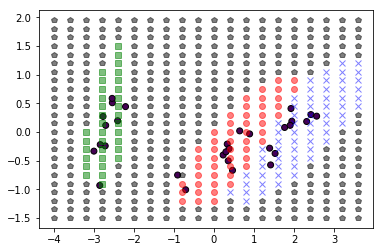

In [100]:
a=[]
for i in np.arange(-4,4,0.4):
    for j in np.arange(-1.5,2,0.15):
        a.append([i,j])
for i in a:
    if clasificador(i)==0:
        plt.plot(i[0],i[1],'s',color='g',alpha=0.5,label="Clase 0") 
    elif clasificador(i)==1:
        plt.plot(i[0],i[1],'o',color='r',alpha=0.5,label="Clase 1")        
    elif clasificador(i)==2:
        plt.plot(i[0],i[1],'x',color='b',alpha=0.5,label="Clase 2")
    elif clasificador(i)==3:
        plt.plot(i[0],i[1],'p',color='black',alpha=0.5,label="Clase 3")

plt.scatter(C0_test[:, 0], C0_test[:, 1], marker='o', c=y0_test, edgecolor='k')
plt.scatter(C1_test[:, 0], C1_test[:, 1], marker='o', c=y1_test, edgecolor='k')
plt.scatter(C2_test[:, 0], C2_test[:, 1], marker='o', c=y2_test, edgecolor='k')